In [63]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

# 데이터 시각화 (Matplotlib) 활용와 왕좌의 게임 데이터 분석

## 1. <a href = https://matplotlib.org/>Matplotlib</a> 개요
- 파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화(visulaization)하는 패키지  
- 2002년 파이썬에서 MATLAB과 유사한 인터페이스를 지원하고자 프로젝트가 시작됨 
- 데이터 시각화를 위해 가장 많이 활용되는 패키지. 최근 bokeh, seaborn과 같은 새로운 시각화 패키지들도 많이 활용되지만, 이 패키지들도 모두 matplotlib과 비슷한 인터페이스를 지원하므로, matplotlib를 이해하면, 배우는 데 어렵지 않다.  
- Matplotlib는 라인 플롯, 바 차트, 파이차트, 히스토그램 등 정형화된 차트나 플롯 이외에도 저수준 api를 사용한 다양한 시각화 기능 제공
- <a href = https://matplotlib.org/gallery/index.html> matplotlib 갤러리</a>에서 다양한 예제/샘플 참고 가능

## 2. Matplotlib 사용법
Matplotlib를 사용하기 위해서는 먼저 <a href = https://matplotlib.org/api/pyplot_api.html>matplotlib.pyplot</a> 을 아래와 같이 import 한다. 
pyplot 객체는 matplotlib의 핵심 모듈로써, figure 생성, 그래프 생성/수정 등 시각화에 필요한 중요 기능을 제공한다. 현재의 figure의 현재 axes에 함수의 결과를 적용한다.  

- figure : 그래프를 그리기 위한 하얀 도화지 개념
- axes (subplot) : figure 안에 그리는 그래프를 지칭함.axes 혹은 subplot이라고 한다. 하나의 figure 안에 여러 개의 axes를 그릴 수 있으나, 하나의 axes는 여러 개의 figure에 속할 수 없다.
<img src="img/예제실습/그림의구조.jpg" alt="그림의구조" style="width: 1200px;"/>

pyplot을 다른 이름으로 사용할 수 있지만, 보통 plt 라는 alias를 사용한다.   
다음 plt.plot()은 라인 플롯을 그리는 함수인데, X축은 a,b,c이고, 값은 10, 20, 30인 라인 플롯을 그리는 예제이다.   
마지막으로 실제 그림을 표시하는 함수인 plt.show()을 호출한다. 보통 plot() 함수를 수행하면 그래프가 표시되므로, plt.show()는 생략하는 경우도 많다.   

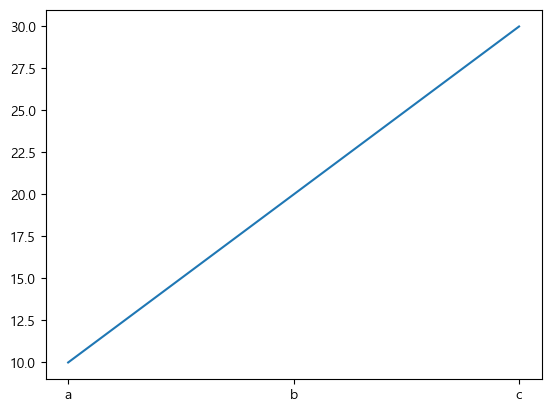

In [64]:
import matplotlib.pyplot as plt

sr = Series([10, 20, 30], index = list('abc'))
plt.plot(sr)

In [65]:
import matplotlib

## 3. matplotlib 간단 실습

### 3.1 하나의 그래프 그리기
3.1.1 line graph 그리기

In [66]:
sr = Series([1,2,4,8,16], index = list('abcde')) # 실습을 위한 샘플 데이터 생성
sr

a     1
b     2
c     4
d     8
e    16
dtype: int64

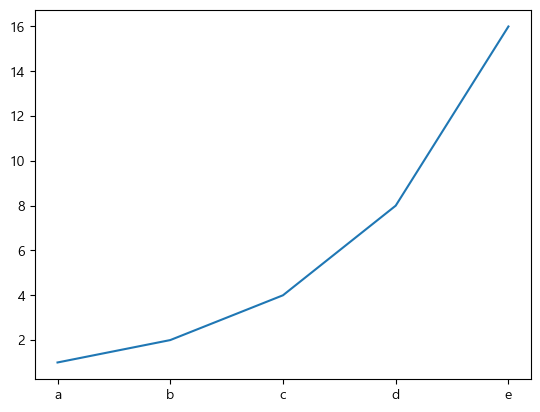

In [67]:
plt.plot(sr) # 라인 그래프 그리기

3.1.2 bar graph 그리기

In [68]:
# 샘플 데이터 생성
import random 
sr2 = Series(random.sample(range(100, 1000), 5), 
             index = list('abcde'))
sr2

a    423
b    717
c    220
d    439
e    568
dtype: int64

<BarContainer object of 5 artists>

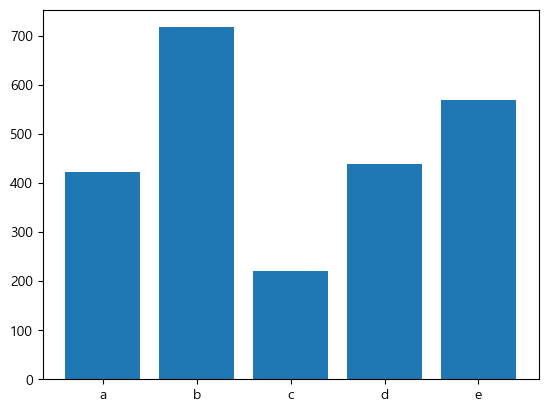

In [69]:
#plt.bar(x = sr2.index, height = sr2.values)
plt.bar(sr2.index, sr2.values)

pandas의 Series와 DataFrame은 데이터 시각화를 위하여 plot() 함수를 제공한다. plot() 함수를 사용하면, 내부적으로 matplotlib에 연관 함수가 호출되면서 그래프가 그려진다.

<AxesSubplot:>

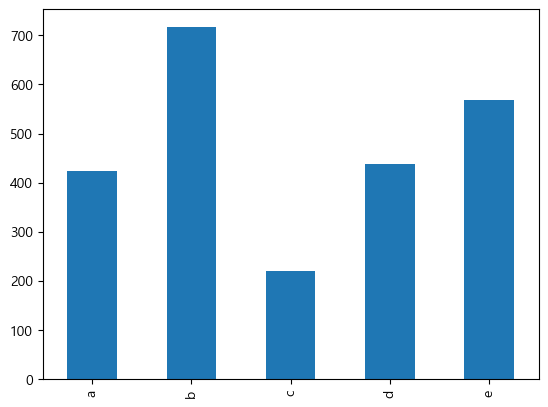

In [70]:
sr2.plot(kind = 'bar')

3.1.3 두 개의 그래프를 하나로 그리기

- <a href = https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.subplots.html> plt.subplots() </a> 함수는 새로운 figure와 axes(subplots)를 생성해 준다.

<BarContainer object of 5 artists>

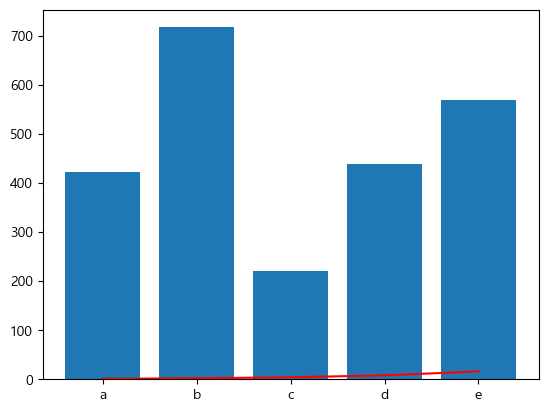

In [71]:
fig, ax = plt.subplots() # subplots()는 새로운 figure와 그 안의 하나의 axes를 만들어서 반환
ax.plot(sr, color = 'r') # 라인 그래프 그리기 
ax.bar(sr2.index, sr2.values) # 동일한 axes에 bar 그래프 그리기

3.14 두 개 그래프를 서로 다른 y축 적용하기

<BarContainer object of 5 artists>

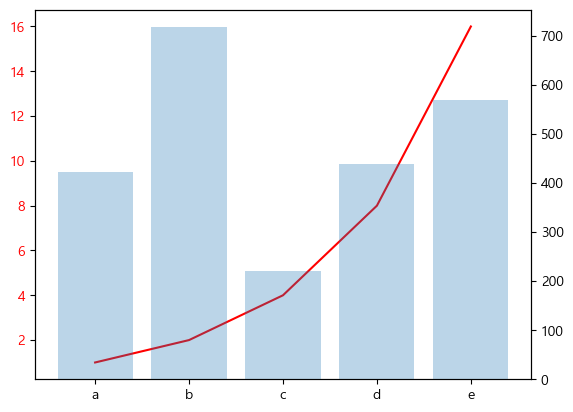

In [72]:
fig, ax1 = plt.subplots()
ax1.plot(sr, color = 'r')
ax1.tick_params(axis = 'y', labelcolor  = 'r') # tick의 색상 변경
ax2 = ax1.twinx() # x축을 공유하는 새로운 axes를 생성
ax2.bar(sr2.index, sr2.values, alpha = 0.3) # ahpla : 색상의 투명도 설정

### 3.2. 여러 개 그래프 그리기 
하나의 figure 안에 여러 개의 axes를 그리기

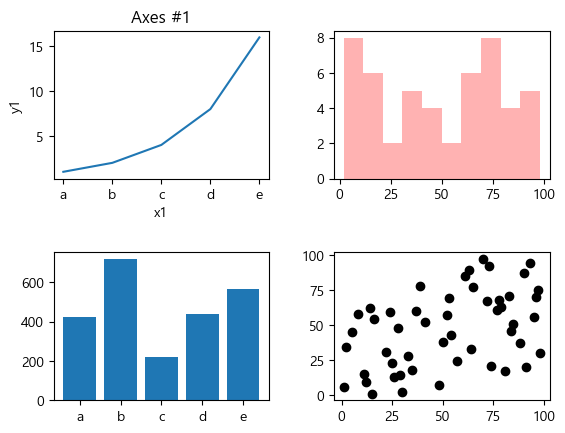

In [73]:
fig, ax_list = plt.subplots(2, 2) # 새로운 figure와 그 안에 2 X 2 형태의 Axes들을 생성
ax_list[0,0].plot(sr) # [0,0]에 있는 axes에 라인 그래프 그리기
ax_list[0,0].set_title('Axes #1') # axes의 제목 설정
ax_list[0,0].set_xlabel('x1') # axes의 x축 제목 설정
ax_list[0,0].set_ylabel('y1') # axes의 y축 제목 설정
ax_list[0,1].hist(random.sample(range(1,100), 50), bins = 10, color = 'r', alpha= 0.3) #[0,1]에 있는 axes에 히스토그램 그리기. 
ax_list[1,0].bar(sr2.index, sr2.values)
ax_list[1,1].scatter(random.sample(range(1,100), 50), 
                               random.sample(range(1,100), 50), color = 'k') # [1,1]에 있는 axes에 scatter 그래프 그리기

plt.subplots_adjust(hspace= 0.5, wspace = 0.3) # Axes들 간의 간격 조절. 

### 3.3. <a href = https://matplotlib.org/3.1.1/tutorials/introductory/usage.html#what-is-a-backend> backend </a> 개념
Matplotlib은 매우 다양한 usecase에 사용되며, 이를 모두 충족시키기 위하여 다양한 backend를 지원함.  
가장 많이 활용하는 옵션은 inline으로, 그래프를 output창에 바로 표현되도록 하는 옵션이며, <strong>%maptlotlib inline</strong>를 실행하여 설정한다. 


%로 시작하는 명령어는 Cell Magic 명령어로써, 파이썬 코드가 아니라 Jupyter에게 특정 기능을 수행하도록 하는 명령이다. 즉, %matplotlib inline 명령은 Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령이다.

In [74]:
# backend를 inline으로 설정
%matplotlib inline

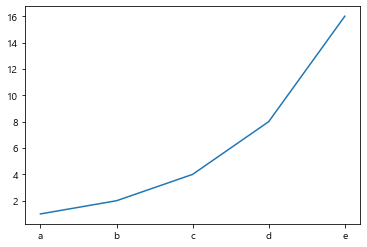

In [75]:
plt.plot(sr)

만약 그래프를 생성한 이후, interactive하게 그래프를 다루고 싶은 경우에는 backend를 interactive backend로 설정하면 된다.  
예를 들어, <strong>%matplotlib nbagg</strong>를 실행하여 <strong>nbagg</strong>으로 설정을 변경할 수 있다.   
보다 다양한 설정 옵션을 확인하려면 <a href = https://matplotlib.org/3.1.1/tutorials/introductory/usage.html#what-is-a-backend> 여기 </a>를 참고하면 된다.  

아래와 같이 nbagg로 설정한 후, 그래프를 생성하면 output 창에 몇몇 버튼과 함께 그래프가 그려진다.  
버튼들을 활용하여 zoon-in, zoom-out이 가능하다.   
그래프를 그린 이후, set_title(), set_xlabel() 함수를 수행하면 현재 그래프에 적용되는 것을 확인할 수 있으며, 오른쪽 상단에 있는 파란색 버튼을 클릭하면 interactive 모드가 종료된다. 

<IPython.core.display.Javascript object>


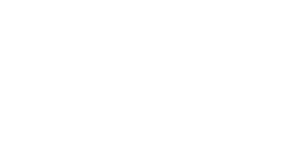

In [76]:
# backend 을 interactive 시각화를 할 수 있도록 설정 가능
%matplotlib nbagg
fig, ax = plt.subplots()
ax.plot(sr)

In [77]:
ax.set_title('Axes #1')

Text(0.5, 1.0, 'Axes #1')

In [78]:
ax.set_xlabel('x-axis label')

Text(0.5, 0, 'x-axis label')

### 3.4 <a href = https://matplotlib.org/users/customizing.html> matplotlib 설정 변경</a>

<strong> 3.4.1 stylesheet 변경</strong>   
   matplotlib을 통해 데이터 시각화할 때 적용되는 스타일을 변경 가능하며, 사용가능한 스타일시트 목록 및 샘플은 <a href= https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html> 여기 </a>에서 확인 가능하다.

In [79]:
# 사용가능한 style 출력
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [80]:
%matplotlib inline

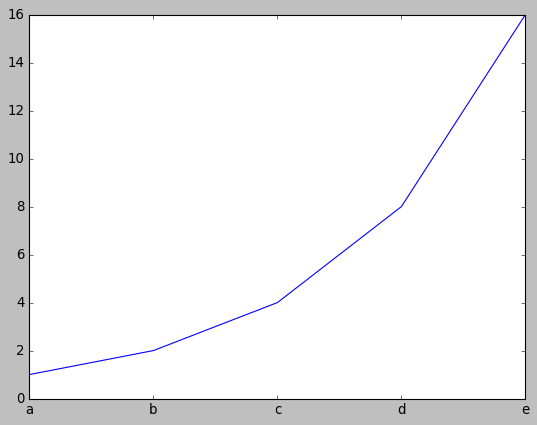

In [81]:
plt.style.use('classic')
plt.plot(sr)

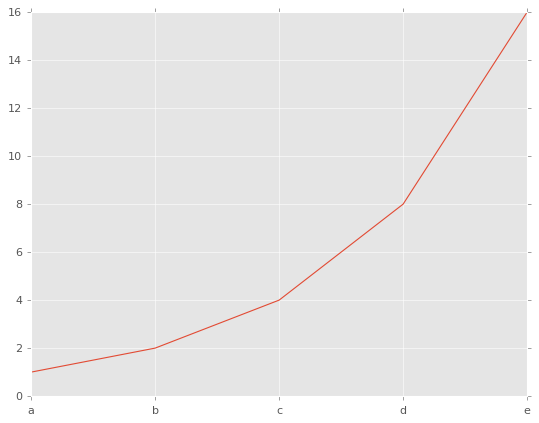

In [82]:
plt.style.use('ggplot')
plt.plot(sr)

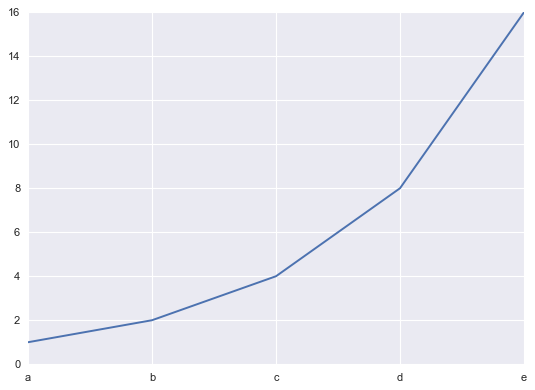

In [83]:
plt.style.use('seaborn')
plt.plot(sr)

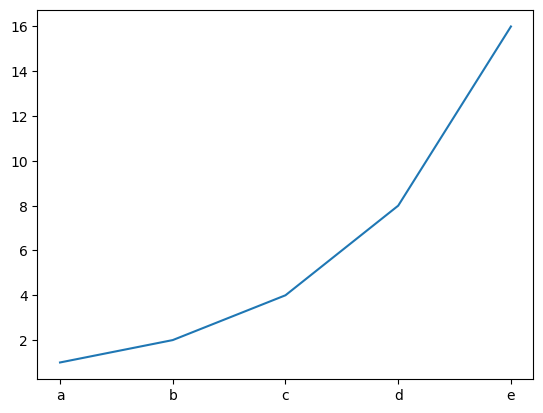

In [84]:
plt.style.use('default') #기본값
plt.plot(sr)

3.4.2 <strong> <i> matplotlibrc</i></strong> 파일 수정을 통한 파라미터 수정 
- matplotlibrc 파일을 통해 figure 크기, axes의 폰트사이즈, 색상, 스타일 등 matplotlib의 모든 속성(property)들을 설정 가능하다. 
- 파일을 변경한 후 저장하면, 이후에는 변경된 설정이 계속 사용된다.
- matplotlibrc 파일을 수정한 후에는 jupyter notebook을 재시작해야 수정 내용이 반영된다. 


matplotlibrc 파일의 위치를 찾으려면 matplotlib.matplot.lib_fname()를 수행하면 된다.

In [85]:
# 설정 파일의 위치 찾기
import matplotlib
matplotlib.matplotlib_fname()

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

3.4.3 matplotlib.rcParams을 통한 동적 설정 변경

- matplotlib의 설정 정보는 <strong> matplotlib.rcParams</strong>에 저장되어 있으며, rcParams는 <strong><i>사전(Dict)</i></strong> 타입니다.
- rcParams 변경을 통해 동적으로 설정이 변경가능하며, 변경 즉시 반영된다. 

In [86]:
# 현재 전체 설정 정보 확인
matplotlib.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [87]:
# 특정 설정 정보 확인
matplotlib.rcParams['font.family']

['sans-serif']

In [88]:
# 설정 변경
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
# 한글 깨짐을 방지하기 위해서는 font.family 설정을 변경하여야 한다.
# window/linux인 경우에는 Malgun Gothic으로, Mac OS인 경우에는 AppleGothic으로 변경한다.

### 3.5 <a href=https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html>Pandas의 plot() 함수를 통한 시각화</a>
- pandas의 대표적인 데이터타입인 Series와 DataFrame은 plot() 함수를 제공하며 이를 통해 여러 차트를 그릴 수 있다.   
- 내부적으로는 Series.plot()과 DataFrame.plot() 모두 matplotlib를 사용하며, 파라미터 인자에 따라 적절한 함수가 호출된다.  
- matplotlib은 plot()은 line graph, bar()는 bar graph, hist()는 히스토그램 등 차트의 종류에 따라 다른 함수를 호출해야 하지만, pandas는 차트의 종류에 상관 없이, 차트를 그리는 함수는 plot()이며, kind 인자를 통해 차트의 종류를 설정할 수 있다.   
- matplotlib의 함수들을 직접 사용하는 것보다 사용자 친화적인 인터페이스를 제공하지만, matplotlib의 모든 기능을 제공하지는 않으므로 약간의 불편함은 존재한다.


In [89]:
인구통계 = {'서울': [1053.5, 1023, 987],
        '경기':[1023, 1067, 1123],
        '충청':[512,489,487],
        '경상':[897, 872, 811],
        '전라':[451, 421, 399]
      }
df = DataFrame(인구통계)
df.index = [2018, 2019, 2020]
df

,서울,경기,충청,경상,전라
2018,1053.5,1023,512,897,451
2019,1023.0,1067,489,872,421
2020,987.0,1123,487,811,399


기본 그리기 - <a href= https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D>line graph</a>

Text(0, 0.5, '인구수')

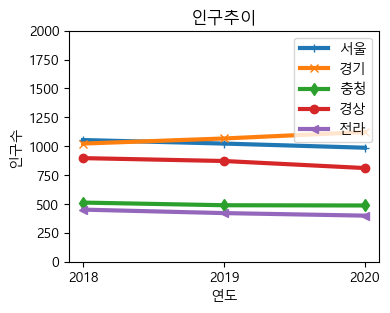

In [90]:

df.plot(kind = 'line', # 차트의 종류
       title = '인구추이', # 그래프 제목
        figsize = (4,3), # figure의 크기
        #style = ['b.--', 'bo-', 'vg-', '^:', 'm<--' ], #아래 그림 참고하여, 색깔, 마커 종류, 선스타일 설정
        style = ['+-', 'x-', 'd-', 'o-', '<-' ], #아래 그림 참고하여, 색깔, 마커 종류, 선스타일 설정
        lw = 3, # line width
        subplots = False, # 기본값 = False -> 하나의 axes에 모든 데이터 표현.  True로 설정하면, 계열 별로 axes를 생성함.
        xticks = df.index, #x축의 tick 설정
        ylim = [0, 2000] # y축의 min,max 설정
       )
plt.xlabel('연도')
plt.ylabel('인구수')

<img src="img/예제실습/matplotlib인자.jpg" alt=" matplotlib" style="width: 1200px;"/>

#### 색상: https://matplotlib.org/examples/color/named_colors.html
#### 기타 스타일: https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D

array([<AxesSubplot:title={'center':'2018'}>,
       <AxesSubplot:title={'center':'2019'}>,
       <AxesSubplot:title={'center':'2020'}>], dtype=object)

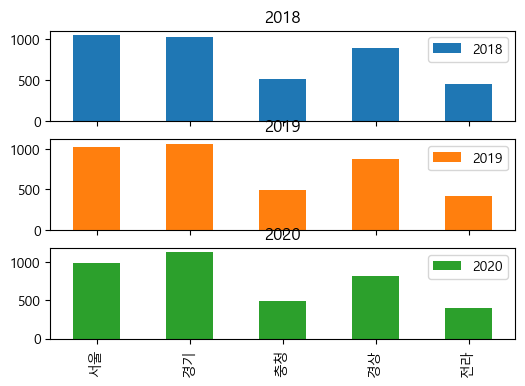

In [91]:
# 실습. 연도별 지역별 인구수 그래프 그리기
df.T.plot(kind = 'bar', subplots = True, figsize = (6,4))

### 3.7 왕좌의 게임 데이터 분석 및 시각화 실습
#### 1) 데이터 적재
- battless.csv : 전투의 이름, 발생년도, 공격/수비 정보(가문, 왕, 군대 규모 등)을 저장
- deaths.csv : 캐릭터들의 이름, 성별 등 기본 정보와 사망 정보

In [92]:
battles = pd.read_csv('data/data-society-game-of-thrones/battles.csv')
death = pd.read_csv('data/data-society-game-of-thrones/character-deaths.csv')

In [93]:
battles.head(1)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN


In [94]:
death.head(1)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0


#### 2) 책의 챕터(Book of Death)별로 사망자 수 추이 시각화

In [95]:
# 책의 챕터별 사망자수 구하기
bookOfDeath = death['Book of Death'].value_counts().sort_index()

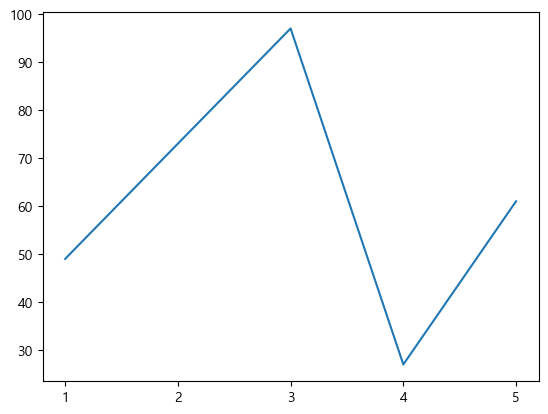

In [97]:
# 기본 그리기
axes1 = bookOfDeath.plot(xticks = bookOfDeath.index)

In [100]:
type(axes1.figure)

matplotlib.figure.Figure

In [44]:
# 그래프 관련 설정하기. 
# plot()의 인자로 정의할 수도 있음
axes1.set_ylim([0, 100])
axes1.set_xlabel('권')
axes1.set_ylabel('사망자수')
axes1.set_title('권별 사망자수 추이')

Text(0.5, 1.0, '권별 사망자수 추이')

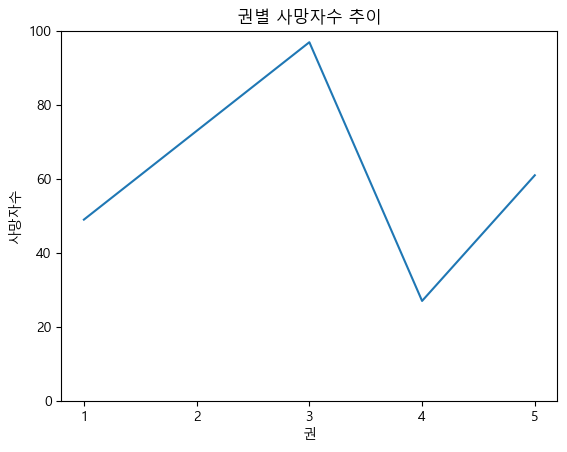

In [45]:
# 설정 변경된 axes를 다시 보기 위해서는 figure 객체를 출력함.
# axes의 figure 속성은 자신이 속한 figure의 정보를 반환함
# 반대로 figure의 axes 속성은 자신이 가지고 있는 axes의 정보를 반환함
axes1.figure

In [102]:
axes1.figure.savefig('test.jpg')

In [72]:
# 그래프를 파일로 저장
axes1.figure.savefig('test.jpg')

#### 3) 대규모 전투의  공격진영과 수비 진영의 숫자 시각화
대규모 전투 = 공격과 수비 모두 합쳐서 10,000명 이상 참가한 전쟁

In [48]:
# 1. 대규모 전쟁만 선택
big_battles = battles[battles.attacker_size + battles.defender_size >= 10000]

In [49]:
# 2. 필요한 컬럼만 선택
big_battles = big_battles[['name', 'attacker_size','defender_size']]

In [50]:
big_battles.set_index('name', inplace = True)

<AxesSubplot:ylabel='name'>

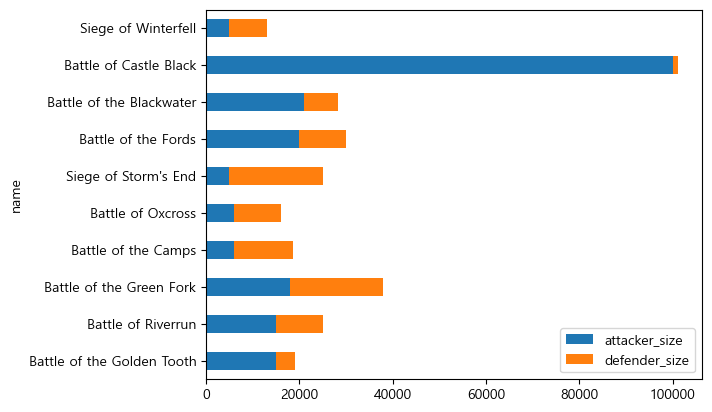

In [51]:
# big_battles 시각화
big_battles.plot(kind = 'barh', stacked = True)
# stacked = True : 하나의 막대로 표현
# stacked = False(기본값): 여러 개(컬럼 갯수)의 막대로 표현 

#### 4) (실습 #1) 가문 별로 전쟁을 참여한 횟수 시각화

In [51]:
battles.head(3)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN


In [52]:
battles.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

In [54]:
# 1. 필요한 컬럼 추출
# attacker_1, ~attacker_2, .. ,defender_4 총 8개의 컬럼이 필요
# 첫번째 방법은 8개의 컬럼을 그냥 나열 
# battles[['attacker_1', 'attacker_2',..]]
# 두번째 방법 - 컬럼을 슬라이싱
#ex1 = battles.loc[:, 'attacker_1':'defender_4']
#세번째 방법  
#cols = battles.columns[5:13]
#battles[cols]
#네번째 방법 - 정규 표현식(regular expression) 활용
#cols = battles.columns[battles.columns.str.contains('attacker_[1-4]|defender_[1-4]')]
#ex1 = battles[cols]
ex1 = battles.filter(regex = 'attacker_[1-4]|defender_[1-4]')
ex1

,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4
0,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
1,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN
2,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
3,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN
4,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN
5,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN
6,Lannister,NaN,NaN,NaN,Darry,NaN,NaN,NaN
7,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN
8,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN
9,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN


In [59]:
ex1.attacker_1.value_counts().add(ex1.attacker_2.value_counts(), fill_value = 0)

Baratheon                      6.0
Bolton                         3.0
Bracken                        1.0
Brave Companions               1.0
Brotherhood without Banners    1.0
Darry                          1.0
Free folk                      1.0
Frey                           3.0
Greyjoy                        8.0
Karstark                       2.0
Lannister                      9.0
Stark                          8.0
Thenns                         1.0
Tully                          3.0
dtype: float64

In [62]:
# 2. 각 컬럼들의 value_counts() 함수 결과를 모두 합치기
house_to_battle_count = Series(dtype = 'float64')
for col in ex1.columns:
    house_to_battle_count = \
        house_to_battle_count.add(ex1[col].value_counts(), fill_value = 0)
house_to_battle_count

Baratheon                      11.0
Blackwood                       1.0
Bolton                          4.0
Bracken                         1.0
Brave Companions                3.0
Brotherhood without Banners     1.0
Darry                           2.0
Free folk                       1.0
Frey                            4.0
Giants                          1.0
Glover                          2.0
Greyjoy                        11.0
Karstark                        2.0
Lannister                      18.0
Mallister                       1.0
Mormont                         2.0
Night's Watch                   1.0
Stark                          16.0
Thenns                          1.0
Tully                           7.0
Tyrell                          2.0
dtype: float64

<AxesSubplot:>

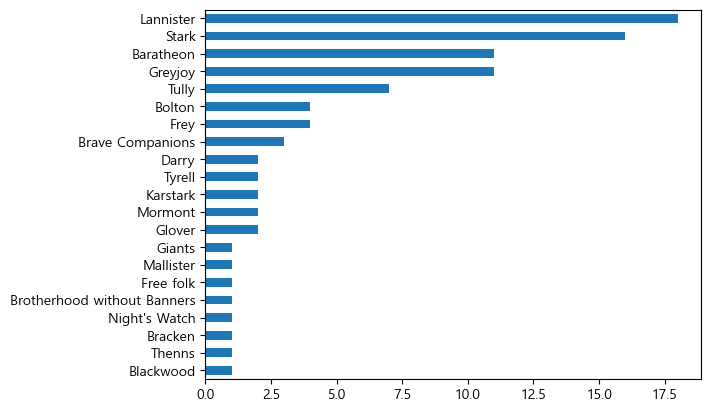

In [55]:
# 전투에 참여한 횟수로 정렬한 후, 시각화
house_to_battle_count.sort_values().plot(kind = 'barh')

#### 5) (실습 #2) 년도별로 사망자의 숫자와 전쟁이 벌어진 횟수 시각화

In [56]:
# 1. 년도별로 사망자의 숫자 구하기
death_for_year = death['Death Year'].value_counts().sort_index()
# pivot_table() 활용해서도 구할 수 있다.
#death.pivot_table(index = 'Death Year', aggfunc = 'count', values ='Name')
# values는 NaN이 없는 임의의 컬럼을 선택
death_for_year

297.0      3
298.0     46
299.0    156
300.0    100
Name: Death Year, dtype: int64

<strong>[Tip]</strong> 어떤 컬럼의 값이 <i>NaN</i>인 데이터를 제외하고 싶은 경우, isnull() 함수 활용 가능

In [57]:
death[~death['Death Year'].isnull()]

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
6,Aemon Targaryen (son of Maekar I),Night's Watch,300.0,4.0,35.0,21.0,1,1,1,0,1,1,0
7,Aenys Frey,None,300.0,5.0,NaN,59.0,0,1,1,1,1,0,1
10,Aggar,House Greyjoy,299.0,2.0,56.0,50.0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,Young Henly,Night's Watch,299.0,3.0,55.0,55.0,1,0,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0


In [58]:
# 2. 년도별로 전쟁이 벌어진 횟수 구하기
battles_for_year = battles.year.value_counts().sort_index()
battles_for_year

298     7
299    20
300    11
Name: year, dtype: int64

In [59]:
# 3. death_for_year와 battles_for_year를 하나의 데이터프레임으로 만들기
death_battles_corr = pd.concat([death_for_year, battles_for_year], axis = 1)
death_battles_corr.columns = ['# of death', '# of battles']
death_battles_corr.fillna(0, inplace = True)

<AxesSubplot:>

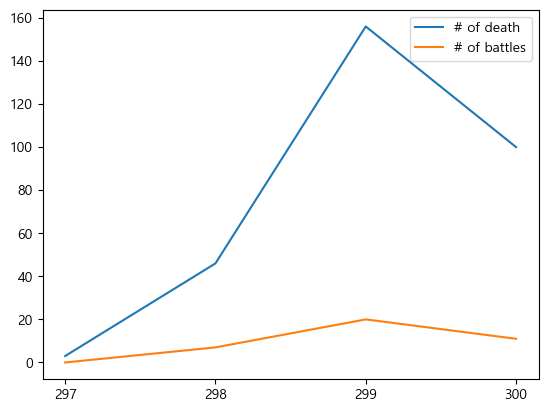

In [61]:
death_battles_corr.plot(xticks = death_battles_corr.index)